In [1]:
%load_ext autoreload
%autoreload 2

import mentevo
import numpy as np

In [2]:
from mentevo.experiment import Experiment
from mentevo.metrics import compute_performance

In [4]:
# crete an experiment
# solve the experiment
# print the dimensions of curves

experiment = Experiment(number_of_agents=2,
                 number_of_tasks=2,
                 communication_graph=None,
                 task_graph=None,
                 alpha=1.0,
                 beta=1.0,
                 gamma=1.0,
                 delta=1.0,
                 d=1.0,
                 tau=1.0,
                 g=None,
                 bias_value=1.0,
                 initial_state=None,
                 total_time=100,
                 number_of_switches=3,
)

In [5]:
curves = experiment.solve()
curves.shape

(4, 100)

In [6]:
curve = np.array([
    np.ones(100),
    np.zeros(100),
    np.ones(100),
    np.zeros(100),
])
curve.shape

(4, 100)

In [7]:
experiment.cue_vector.shape

(100, 4)

In [8]:
def debug_performance(experiment, curves):
    """
    todo: add docstring
    """
    assert isinstance(curves, np.ndarray)

    na = experiment.number_of_agents
    no = experiment.number_of_tasks

    assert no == 2, 'this function works only for number_of_tasks = 2'

    # use the cue vector to measure the performance
    labels = np.sign(experiment.cue_vector)
    assert labels.shape == (experiment.total_time, 2 * na)
    assert curves.shape == (2 * experiment.number_of_agents, experiment.total_time)

    # compute the score using labels and curves
    score = labels * curves.T
    
    return score

(array([62.86816553, 62.80881368]), np.float64(125.6769792110221))


(100, 4)

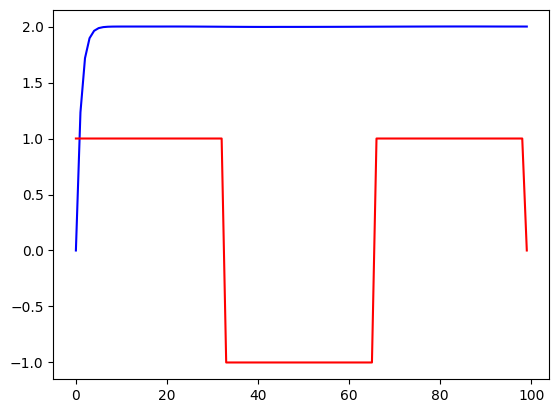

In [9]:
import matplotlib.pyplot as plt

plt.plot(curves[0] - curves[1], c='b')
plt.plot(experiment.cue_vector[:, 0], c='r')
print(compute_performance(experiment, curves))

score_detail = debug_performance(experiment, curves)
score_detail.shape # (100, 4)

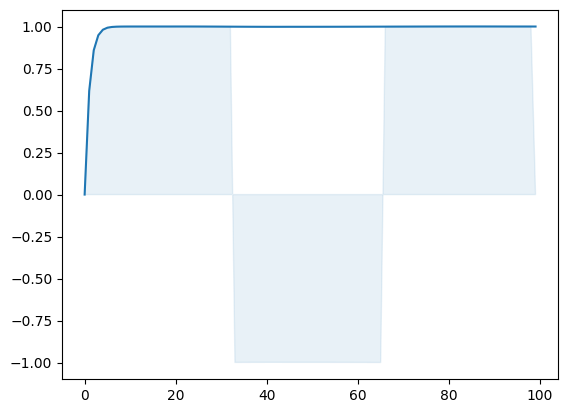

In [10]:
plt.plot(curves[0], label='agent 1 task 1')
cmap = plt.get_cmap('tab10')
colors = cmap(np.sign(score_detail[:,0]))
plt.fill_between(range(100), np.zeros(100), score_detail[:, 0], alpha=0.1, color=colors, label='score agent 1 task 1')

In [11]:
colors

array([[0.12156863, 0.46666667, 0.70588235, 1.        ],
       [0.09019608, 0.74509804, 0.81176471, 1.        ],
       [0.09019608, 0.74509804, 0.81176471, 1.        ],
       [0.09019608, 0.74509804, 0.81176471, 1.        ],
       [0.09019608, 0.74509804, 0.81176471, 1.        ],
       [0.09019608, 0.74509804, 0.81176471, 1.        ],
       [0.09019608, 0.74509804, 0.81176471, 1.        ],
       [0.09019608, 0.74509804, 0.81176471, 1.        ],
       [0.09019608, 0.74509804, 0.81176471, 1.        ],
       [0.09019608, 0.74509804, 0.81176471, 1.        ],
       [0.09019608, 0.74509804, 0.81176471, 1.        ],
       [0.09019608, 0.74509804, 0.81176471, 1.        ],
       [0.09019608, 0.74509804, 0.81176471, 1.        ],
       [0.09019608, 0.74509804, 0.81176471, 1.        ],
       [0.09019608, 0.74509804, 0.81176471, 1.        ],
       [0.09019608, 0.74509804, 0.81176471, 1.        ],
       [0.09019608, 0.74509804, 0.81176471, 1.        ],
       [0.09019608, 0.74509804,

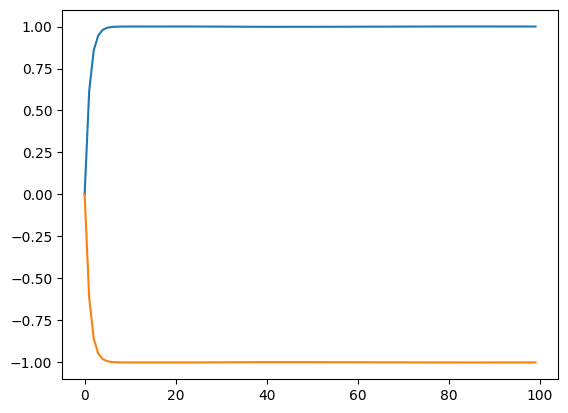

In [12]:
plt.plot(curves[0], label='agent 1 task 1')
plt.plot(curves[1], label='agent 1 task 2')

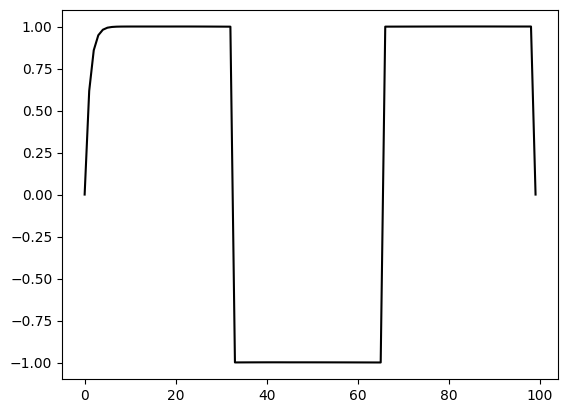

In [13]:
plt.plot(score_detail[:, 0], c='black')
#plt.plot(score_detail[:, 1], c='green')